## Chapter 6
# Derivation of the Discrete Fourier Transform (DFT)

### DFT Sinusoids for $N=8$

Below is a replication of _Fig. 6.2_ on _page 102_:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

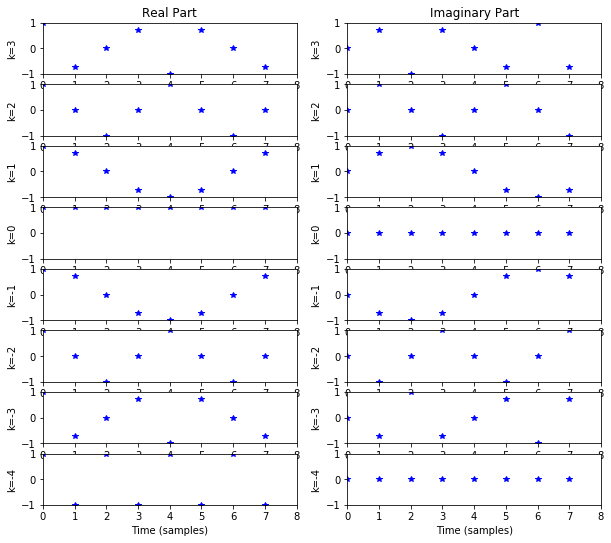

In [2]:
N = 8
fs = 1

n = np.arange(N)
t = np.linspace(0, 0.01, N)
k = n[::-1] - N / 2

fk = k * fs / N
wk = 2 * np.pi * fk

fig = plt.figure(figsize=(10, 10))

for i in range(N):
    plt.subplot(N + 1, 2, 2 * (i + 1) - 1)
    plt.plot(t, np.cos(wk[i] * t))
    plt.axis([0, 8, -1, 1])
    plt.plot(n, np.cos(wk[i] * n), '*', c='b')
    if i == 0:
        plt.title('Real Part')
    plt.ylabel('k=%d' % k[i])
    if i == N - 1:
        plt.xlabel('Time (samples)')
    plt.subplot(N + 1, 2, 2 * (i + 1))
    plt.plot(t, np.sin(wk[i] * t))
    plt.axis([0, 8, -1, 1])
    plt.plot(n, np.sin(wk[i] * n), '*', c='b')
    plt.ylabel('k=%d' % k[i])
    if i == 0:
        plt.title('Imaginary Part')
    if i == N - 1:
        plt.xlabel('Time (samples)')

### DFT Bin Response

Below is a replication of _Fig. 6.3_ on _page 107_:

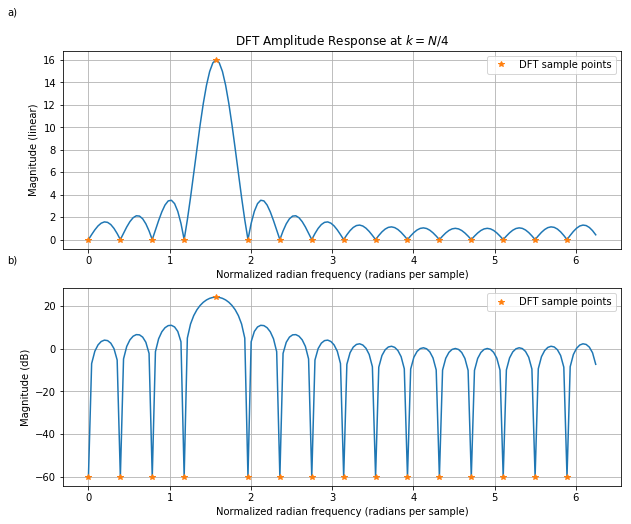

In [3]:
fig = plt.figure(figsize=(10, 8))

N = 16 # DFT length
k = N / 4 # bin where DFT filter is centered
wk = 2 * np.pi * k / N # normalized radian center-frequency
w = np.linspace(0, 2 * np.pi, N, endpoint=False)
interp = 10
N2 = interp * N # denser grid showing "arbitrary" frequencies
w2 = np.linspace(0, 2 * np.pi, N2, endpoint=False)
X = (1 - np.exp(1j * (w2 - wk) * N)) / (1 - np.exp(1j * (w2 - wk)) + 1e-20)
X[int(k * interp)] = N # fix divide-by-zero point (overwrite NaN)

mag_X = np.abs(X)
mag_Xd = mag_X[:N2:interp]
plt.subplot(211)
plt.plot(w2, mag_X, '-')
plt.plot(w, mag_Xd, '*', label='DFT sample points')
plt.title('DFT Amplitude Response at $k=N/4$')
plt.xlabel('Normalized radian frequency (radians per sample)')
plt.ylabel('Magnitude (linear)')
plt.grid(True)
plt.text(-1, 20, 'a)')
plt.legend()

# Same thing on a dB scale
mag_X_db = 20 * np.log10(mag_X)
# since the zeros go to minus infinity, clip at -60 dB
mag_X_db = np.maximum(mag_X_db, -60)
mag_X_ddb = mag_X_db[:N2:interp]
plt.subplot(212)
plt.plot(w2, mag_X_db, '-')
plt.plot(w, mag_X_ddb, '*', label='DFT sample points')
plt.xlabel('Normalized radian frequency (radians per sample)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.text(-1, 40, 'b)')
_ = plt.legend()

## DFT Problems

**1. Show that if two length $N$ sampled sinusoids $s_k(n)$ and $s_l(n)$ are orthogonal, i.e. $s_k \perp s_l$, then $\mathcal{A}s_k \perp \mathcal{B}s_l$ for all complex constants $\mathcal{A}$ and $\mathcal{B}$. That is, the orthogonality of two sinusoids is independent of their phases and (nonzero) amplitudes.**

$\begin{align}
\langle \mathcal{A}s_k, \mathcal{B}s_l \rangle &\triangleq \sum_\limits{n=0}^\limits{N-1}\mathcal{A}s_k(n)\overline{\mathcal{B}s_l(n)}\\
&= \sum_\limits{n=0}^\limits{N-1}Ae^{j\phi_A}e^{j2\pi kn/N}Be^{-j\phi_B}e^{-j2\pi ln/N}\\
&= ABe^{j\phi_A}e^{-j\phi_B}\sum_\limits{n=0}^\limits{N-1}e^{j2\pi kn/N}e^{-j2\pi ln/N}\\
&= ABe^{j\phi_A}e^{-j\phi_B}\sum_\limits{n=0}^\limits{N-1}s_k(n)\overline{s_l(n)}\\
&= ABe^{j\phi_A}e^{-j\phi_B}\langle s_k, s_l \rangle\\
&=0\\
\end{align}
$,

where in the last step we used that $s_k \perp s_l$ (although we only needed that $k \neq l$.

**2. Find the length $N = 8$ DFTs of the following sequences:  
a) $x_1 = [1,0,0,0,0,0,0,0]$ (the "impulse" signal)  
b) $x_2 = [0,1,0,0,0,0,0,0]$ (delayed impulse)  
c) $x_3 = [1,1,1,1,1,1,1,1]$ ("dc")  
d) $x_4 = [2,1,0,0,0,0,0,1]$  
e) Express $X_4(k)$ in terms of $X_1(k)$ and $X_2(k)$, where $X_i(k)$ denotes the $k_{th}$ bin of the DFT of $x_i$.  
f) Sketch the magnitude spectrum and phase spectrum for the sequence $x = [1,2,1,0,0,...]$. [Note that now $N \to \infty$, so $X = \text{DTFT}(x)$.] Label all extreme values.**

In [4]:
def dft(x):
    x = np.asarray(x)
    N = len(x)
    return np.array([np.sum(x * np.exp(-1j * 2 * np.pi * k * np.arange(N) / N)) for k in range(N)])

In [5]:
X_1 = dft([1.,0,0,0,0,0,0,0])
X_1

array([ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j])

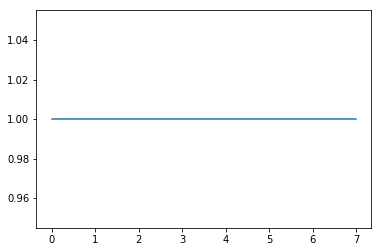

In [6]:
_ = plt.plot(np.abs(X_1))

In [7]:
#2b
X_2 = dft([0,1.,0,0,0,0,0,0])
X_2

array([  1.00000000e+00 +0.00000000e+00j,
         7.07106781e-01 -7.07106781e-01j,
         6.12323400e-17 -1.00000000e+00j,
        -7.07106781e-01 -7.07106781e-01j,
        -1.00000000e+00 -1.22464680e-16j,
        -7.07106781e-01 +7.07106781e-01j,
        -1.83697020e-16 +1.00000000e+00j,   7.07106781e-01 +7.07106781e-01j])

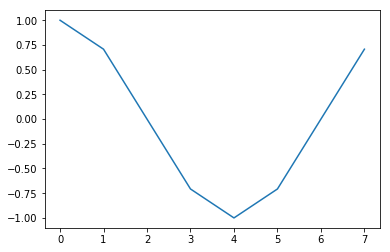

In [8]:
_ = plt.plot(X_2.real)

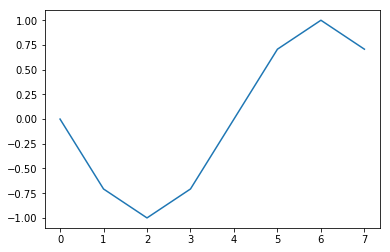

In [9]:
_ = plt.plot(X_2.imag)

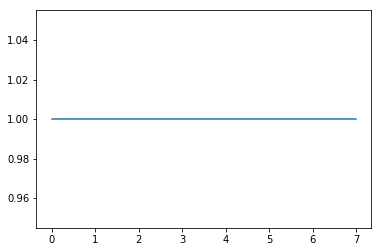

In [10]:
_ = plt.plot(np.abs(X_2))

In [11]:
X_3 = dft([1.,1,1,1,1,1,1,1])
X_3

array([  8.00000000e+00 +0.00000000e+00j,
        -2.33486982e-16 -1.14423775e-17j,
         0.00000000e+00 -2.22044605e-16j,
        -2.98739775e-16 +8.53851287e-16j,
         0.00000000e+00 -4.89858720e-16j,
        -2.16663563e-15 -1.16743491e-15j,
        -2.88657986e-15 -4.44089210e-16j,   3.41076572e-15 +1.03012638e-15j])

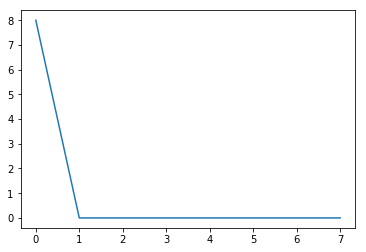

In [12]:
_ = plt.plot(np.abs(X_3))

In [13]:
#2d
X_4 = dft([2,1,0,0,0,0,0,1])
X_4

array([ 4.00000000 +0.00000000e+00j,  3.41421356 +2.22044605e-16j,
        2.00000000 +0.00000000e+00j,  0.58578644 +1.11022302e-16j,
        0.00000000 -9.79717439e-16j,  0.58578644 -1.44328993e-15j,
        2.00000000 +0.00000000e+00j,  3.41421356 +3.10862447e-15j])

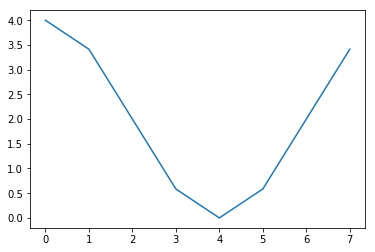

In [14]:
_ = plt.plot(np.abs(X_4))

e) Express $X_4(k)$ in terms of $X_1(k)$ and $X_2(k)$, where $X_i(k)$ denotes the $k_{th}$ bin of the DFT of $x_i$.  

$X_4(k) = (2X_1(k))(X_1(k) + \text{re}\{X_2(k)\})$

In [15]:
X_4

array([ 4.00000000 +0.00000000e+00j,  3.41421356 +2.22044605e-16j,
        2.00000000 +0.00000000e+00j,  0.58578644 +1.11022302e-16j,
        0.00000000 -9.79717439e-16j,  0.58578644 -1.44328993e-15j,
        2.00000000 +0.00000000e+00j,  3.41421356 +3.10862447e-15j])

In [16]:
2 * X_1 * (X_1 + X_2.real)

array([ 4.00000000+0.j,  3.41421356+0.j,  2.00000000+0.j,  0.58578644+0.j,
        0.00000000+0.j,  0.58578644+0.j,  2.00000000+0.j,  3.41421356+0.j])

_These are the same within floating point precision error ($X_4$ theoretically has 0 imaginary component)._

f) Sketch the magnitude spectrum and phase spectrum for the sequence $x = [1,2,1,0,0,...]$. [Note that now $N \to \infty$, so $X = \text{DTFT}(x)$.] Label all extreme values.

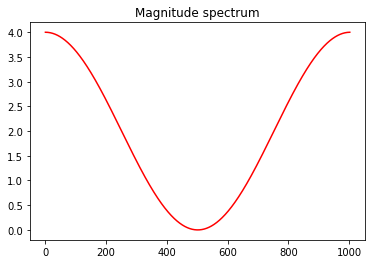

In [17]:
X = dft([1,2,1] + [0] * 1000)
plt.title('Magnitude spectrum')
_ = plt.plot(np.abs(X), c='r')

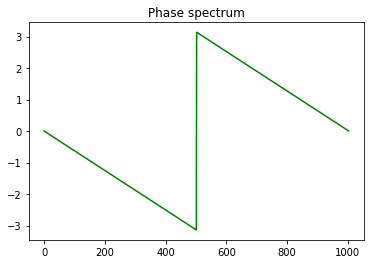

In [18]:
plt.title('Phase spectrum')
_ = plt.plot(np.angle(X), c='g')

The only thing I would classify as "extreme" here is the sharp phase jump from $-\pi$ to $\pi$ (although this is just a smooth phase line wrapping around $\pi$).

**3. Show how to construct the DFT of a length $2N$ _real-valued_ signal from a length $N$ complex DFT. Start by placing the first $N$ points in the real part of the DFT input, and the remaining $N$ points in the imaginary part.**

In [19]:
def real_to_complex_dft(double_length_real_input):
    N = len(double_length_real_input) // 2
    complex_input = np.copy(double_length_real_input[:N]).astype(complex)
    complex_input.imag = double_length_real_input[N:]
    return dft(complex_input)

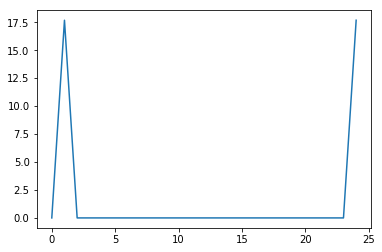

In [20]:
X = real_to_complex_dft(np.sin(np.linspace(-2 * np.pi, 2 * np.pi, 50, endpoint=False)))
_ = plt.plot(np.abs(X))

**4. Find the length $N$ DFT for the following signals $x \in \mathbb{R}^N$**

**a) Impulse train: $x(n) = \begin{cases}\begin{array}{ll}1, & n \space \text{even}\\0, & n \space \text{odd}\end{array}\end{cases}$**

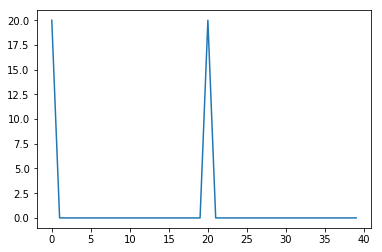

In [21]:
X = dft([1,0] * 20)
_ = plt.plot(np.abs(X))

As show above, the DFT for the even impulse signal has ones at the $0$ and $N / 2$ bins (dc and Nyquist frequencies).

(See [page 157 of the book](https://ccrma.stanford.edu/~jos/st/Stretch_Theorem_Repeat_Theorem.html) for a proof of why stretching a signal by a factor $L$ (inserting zeros between the original samples), its spectrum is repeated $L$ times around the unit circle).

**b) Sampled complex sinusoid: $x(n) = e^{j2\pi n l/N}$, $l$ any integer**

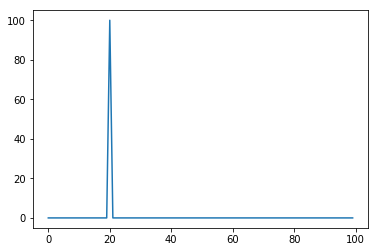

In [22]:
N = 100
l = 20
X = dft(np.exp(1j * 2 * np.pi * np.arange(N) * l / N))
_ = plt.plot(np.abs(X))

As shown above, the DFT of a complex sinusoid has a single nonzero bin at $l$.

**5. A _rotation_ can be defined as a linear transformation which preserves angles. Show that a real matrix $R$ corresponds to a rotation in $\mathbb{R}^N$ if and only if $R^TR = \boldsymbol{I}$.**

We need to prove two directions.

First direction: show that if $R$ corresponds to a rotation in $\mathbb{R}^N$, then $R^TR = \boldsymbol{I}$.

If $R$ corresponds to a rotation in $\mathbb{R}^N$, then the product $R\boldsymbol{v}$ for a column-vector $\boldsymbol{v} \in \mathbb{R}^N$ will be $\boldsymbol{v}$ rotated by some angle $\theta$ in radians.

(TODO finish. Having trouble.  It is easy to show that, since the cosine of the angle between two real vectors is the normalized inner product, that transforming one of the rows of the rotation matrix with the rotation matrix itself will have an inner-product of $1$, thus corresponding to a rotation of $\theta = 0$ radians, at the diagonal entry corresponding to the row dot-producted with itself. But I cannot seem to be able to show the more difficult part - why the entries corresponding to the dot-product of that column member with any _other_ row in the transposed matrix would necessarily be $0$. (Why must the columns of the rotation matrix be orthogonal? What can we say in general about the column entries of a matrix that rotates?)